# Resources

## Regression Visual Explainers
- https://mlu-explain.github.io/linear-regression/
- https://setosa.io/ev/ordinary-least-squares-regression/
- https://www.statology.org/correlation-vs-regression/
## Linear Regression Explainers
- https://www.youtube.com/watch?v=zPG4NjIkCjc
- https://www.youtube.com/watch?v=CtsRRUddV2s
- https://www.youtube.com/watch?v=m88h75F3Rl8
- https://www.youtube.com/watch?v=qxo8p8PtFeA
- https://www.youtube.com/watch?v=nk2CQITm_eo
## OLS Explainers
- https://www.youtube.com/watch?v=EEwzx9UpgsY
- https://www.youtube.com/watch?v=83yvCZj47c4
- https://www.youtube.com/watch?v=RdvKNJzUWyo
- https://www.youtube.com/watch?v=V7GbQB2rgm0
## GWR Explainers
- https://www.youtube.com/watch?v=YDG3LAijWHQ
- https://www.youtube.com/watch?v=DEDjYUhH3v4
- https://www.youtube.com/watch?v=j5vdBIKfhK8
## MGWR Explainers
- https://www.youtube.com/watch?v=m4drOr1nUNk
- https://www.youtube.com/watch?v=9-vKaUhhltw
- https://www.youtube.com/watch?v=U7Oj4oUzccM
- https://www.youtube.com/watch?v=o8lDAJaFZfU
## GWR and MGWR Docs
- https://medium.com/the-die-is-forecast/geographically-weighted-regression-for-electoral-data-some-extensions-cc0f18d25482
- https://medium.com/the-die-is-forecast/spatial-regression-techniques-for-analyzing-election-data-62a234fc6de1
- https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/how-geographicallyweightedregression-works.htm
- https://gis.stackexchange.com/questions/387446/interpreting-geographically-weighted-regression-gwr
- https://desktop.arcgis.com/en/arcmap/latest/tools/spatial-statistics-toolbox/interpreting-gwr-results.htm
- https://gwr.maynoothuniversity.ie/
- https://gwr.maynoothuniversity.ie/what-is-gwr/
- https://gisgeography.com/geographically-weighted-regression/
- https://carto.com/blog/how-geographically-weighted-regression-works
- Explore https://github.com/pysal/mgwr (especially the notebooks folder)
- Explore https://pysal.org/

# Prepare Environment

In [1]:
import numpy as np
import pandas as pd
import libpysal as ps

In [2]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, shift_colormap, truncate_colormap

In [3]:
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [4]:
ghana_raw = pd.read_csv("~/Documents/Research/Infovis/Geospatial/Ghana/ghana.csv")

In [4]:
americas_raw = pd.read_csv("~/Documents/Research/CERC Migration/MEMO/QGIS Files/Americas/CentralAmericaModeling_CSV_Input_File.csv")

In [5]:
americas_raw.head()

,fid,gridcode,lat,lon,NETMg2010,GDPSu2010,HDIAv2010,ANEAv2010,RURSu2010,TOWSu2010,URBSu2010,MLDSAv2010,MLWSAv2010,PRECAv2010,TMAXMx2010,TMINMn2010,NUTSu2010,SUGSu2010,BANSu2010
0,496,375152,-90.874708,17.643523,498.833160,193891.83,0.617,17.385,734,0,0,32.0,14.0,1923.94,41.00,8.44,8.486941,64.697630,13.654367
1,497,375153,-90.624708,17.643523,115.557354,171197.73,0.617,17.385,727,0,0,31.2,14.2,1857.25,40.50,7.56,8.040141,62.817914,13.256974
2,498,375154,-90.374708,17.643523,40.979623,37305.95,0.617,17.279,728,0,0,30.8,11.6,1852.69,39.97,7.06,2.653483,19.588861,4.050981
3,499,375155,-90.124708,17.643523,0.000000,2974.39,0.617,18.447,735,0,0,29.4,11.0,1751.06,39.57,6.96,1.168112,7.775953,1.482296
4,500,375156,-89.874708,17.643523,0.000000,47.55,0.617,22.533,727,0,0,27.2,9.4,1675.37,38.47,6.65,0.367599,2.915066,0.323517


In [6]:
americas_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fid         338 non-null    int64  
 1   gridcode    338 non-null    int64  
 2   lat         338 non-null    float64
 3   lon         338 non-null    float64
 4   NETMg2010   338 non-null    float64
 5   GDPSu2010   338 non-null    float64
 6   HDIAv2010   338 non-null    float64
 7   ANEAv2010   338 non-null    float64
 8   RURSu2010   338 non-null    int64  
 9   TOWSu2010   338 non-null    int64  
 10  URBSu2010   338 non-null    int64  
 11  MLDSAv2010  338 non-null    float64
 12  MLWSAv2010  338 non-null    float64
 13  PRECAv2010  338 non-null    float64
 14  TMAXMx2010  338 non-null    float64
 15  TMINMn2010  338 non-null    float64
 16  NUTSu2010   338 non-null    float64
 17  SUGSu2010   338 non-null    float64
 18  BANSu2010   338 non-null    float64
dtypes: float64(14), int64(5)
memo

In [5]:
ghana_net = ghana_raw.filter(like='NET')
ghana_edu = ghana_raw.filter(like='EDU')
ghana_edu.head()

,EDU0Su1995,EDU0Su2000,EDU0Su2005,EDU0Su2010,EDU0Ra2000,EDU0Ra2005,EDU0Ra2010,EDU1Su1995,EDU1Su2000,EDU1Su2005,...,EDU3Ra2000,EDU3Ra2005,EDU3Ra2010,EDUHSu1995,EDUHSu2000,EDUHSu2005,EDUHSu2010,EDUHRa2000,EDUHRa2005,EDUHRa2010
0,11.965681,14.078416,2.000760,1.213848,0.176566,-0.857885,-0.393307,0.520247,1.759802,2.000760,...,0.691314,-0.621026,6.280321,1.579477,1.856459,1.225025,0.796812,0.175,-0.340,-0.350
1,16.127657,24.470316,0.000000,0.000000,0.517289,-1.000000,0.000000,2.080988,0.906308,0.000000,...,0.000000,0.000000,0.000000,1.132960,0.836894,0.000000,1.330205,-0.261,0.000,0.000
2,5.864320,4.720776,1.354090,2.647208,-0.195000,-0.713164,0.954972,1.379840,1.180194,1.083272,...,0.000000,0.000000,0.000000,0.370906,0.457614,0.712347,1.007149,0.234,0.557,0.414
3,3.794560,5.465775,4.346069,0.551742,0.440424,-0.204858,-0.873048,0.344960,0.260275,1.002939,...,0.000000,0.000000,3.125939,0.391512,0.400713,1.358079,0.000000,0.024,2.389,0.000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.712523,0.000,0.000,0.000


In [6]:
ghana_subset = pd.merge(ghana_edu, ghana_net, left_index=True, right_index=True)
ghana_subset.head()

,EDU0Su1995,EDU0Su2000,EDU0Su2005,EDU0Su2010,EDU0Ra2000,EDU0Ra2005,EDU0Ra2010,EDU1Su1995,EDU1Su2000,EDU1Su2005,...,NETMg1990,NETMg1995,NETMg2000,NETMg2005,NETMg2010,NETRa1990,NETRa1995,NETRa2000,NETRa2005,NETRa2010
0,11.965681,14.078416,2.000760,1.213848,0.176566,-0.857885,-0.393307,0.520247,1.759802,2.000760,...,-4747,-4427,4836,3647,2507,-0.462583,-0.067411,-2.092388,-0.245864,-0.312586
1,16.127657,24.470316,0.000000,0.000000,0.517289,-1.000000,0.000000,2.080988,0.906308,0.000000,...,-16171,-15529,-15391,-15784,-16281,1.843003,-0.039701,-0.008887,0.025534,0.031488
2,5.864320,4.720776,1.354090,2.647208,-0.195000,-0.713164,0.954972,1.379840,1.180194,1.083272,...,1651,1077,856,141,-575,-2.301024,-0.347668,-0.205200,-0.835280,-5.078014
3,3.794560,5.465775,4.346069,0.551742,0.440424,-0.204858,-0.873048,0.344960,0.260275,1.002939,...,406,347,445,375,307,0.000000,-0.145320,0.282421,-0.157303,-0.181333
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1578,1246,-617,-755,-899,8.017143,-0.210393,-1.495185,0.223663,0.190728


<AxesSubplot:>

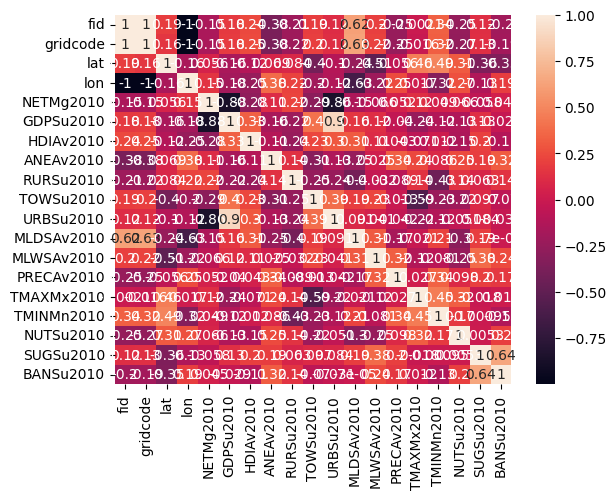

In [7]:
import seaborn as sns
sns.heatmap(americas_raw.corr(), annot=True)

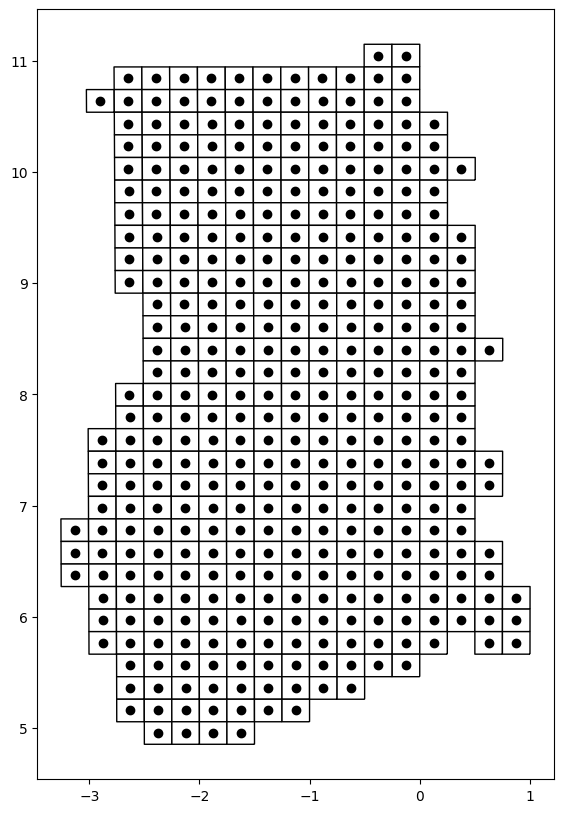

In [11]:
# load Ghana MGWR dataset
ghana = gp.read_file('~/Documents/Research/CERC Migration/MEMO/QGIS Files/Ghana/ghana_mgwr/ghana_mgwr.shp')
fix, ax = plt.subplots(figsize = (10, 10))
ghana.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
ghana.centroid.plot(ax = ax, c = 'black')
plt.savefig('ghana_mgwr_shp')
plt.show()

<AxesSubplot:>

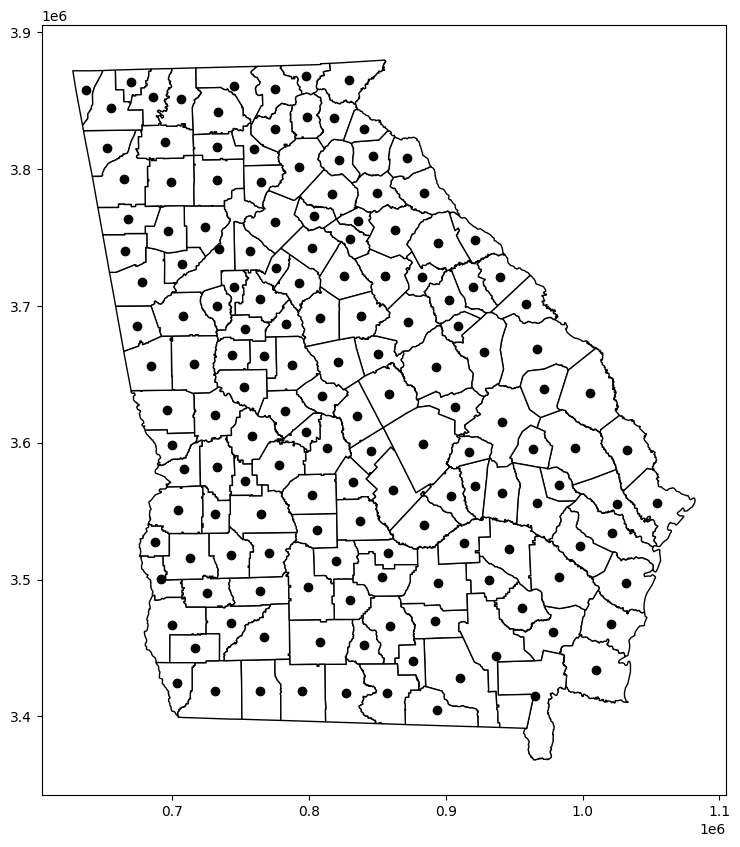

In [25]:
#Load Georgia dataset and generate plot of Georgia counties (figure 1)
georgia_data = pd.read_csv(ps.examples.get_path('GData_utm.csv'))
georgia_shp = gp.read_file(ps.examples.get_path('G_utm.shp'))
fig, ax = plt.subplots(figsize=(10,10))
georgia_shp.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
georgia_shp.centroid.plot(ax=ax, c='black')

In [26]:
georgia_data.head()

,AreaKey,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,ID,X,Y
0,13001,31.75339,-82.28558,15744,75.6,8.2,11.43,0.64,19.9,20.76,133,941396.6,3521764.0
1,13003,31.29486,-82.87474,6213,100.0,6.4,11.77,1.58,26.0,26.86,158,895553.0,3471916.0
2,13005,31.55678,-82.45115,9566,61.7,6.6,11.11,0.27,24.1,15.42,146,930946.4,3502787.0
3,13007,31.33084,-84.45401,3615,100.0,9.4,13.17,0.11,24.8,51.67,155,745398.6,3474765.0
4,13009,33.07193,-83.25085,39530,42.7,13.3,8.64,1.43,17.5,42.39,79,849431.3,3665553.0


In [11]:
americas.head()

,fid,VALUE,VALUE_sum,index_righ,Id,gridcode,x,y,lat,lon,...,URBSu2010,MLDSAv2010,MLWSAv2010,PRECAv2010,TMAXMx2010,TMINMn2010,NUTSu2010,SUGSu2010,BANSu2010,geometry
0,496.0,66.239998,498.833160,0.0,375152.0,375152.0,-90.874708,17.643523,-90.874708,17.643523,...,0,32.0,14.0,1923.94,41.00,8.44,8.486941,64.697630,13.654367,"POLYGON ((-91 17.5, -91 17.75, -90.75 17.75, -..."
1,497.0,58.650002,115.557354,1.0,375153.0,375153.0,-90.624708,17.643523,-90.624708,17.643523,...,0,31.2,14.2,1857.25,40.50,7.56,8.040141,62.817914,13.256974,"POLYGON ((-90.75 17.5, -90.75 17.75, -90.5 17...."
2,498.0,57.599998,40.979623,2.0,375154.0,375154.0,-90.374708,17.643523,-90.374708,17.643523,...,0,30.8,11.6,1852.69,39.97,7.06,2.653483,19.588861,4.050981,"POLYGON ((-90.5 17.5, -90.5 17.75, -90.25 17.7..."
3,499.0,58.950001,0.000000,3.0,375155.0,375155.0,-90.124708,17.643523,-90.124708,17.643523,...,0,29.4,11.0,1751.06,39.57,6.96,1.168112,7.775953,1.482296,"POLYGON ((-90.25 17.5, -90.25 17.75, -90 17.75..."
4,500.0,62.599998,0.000000,4.0,375156.0,375156.0,-89.874708,17.643523,-89.874708,17.643523,...,0,27.2,9.4,1675.37,38.47,6.65,0.367599,2.915066,0.323517,"POLYGON ((-90 17.5, -90 17.75, -89.75 17.75, -..."


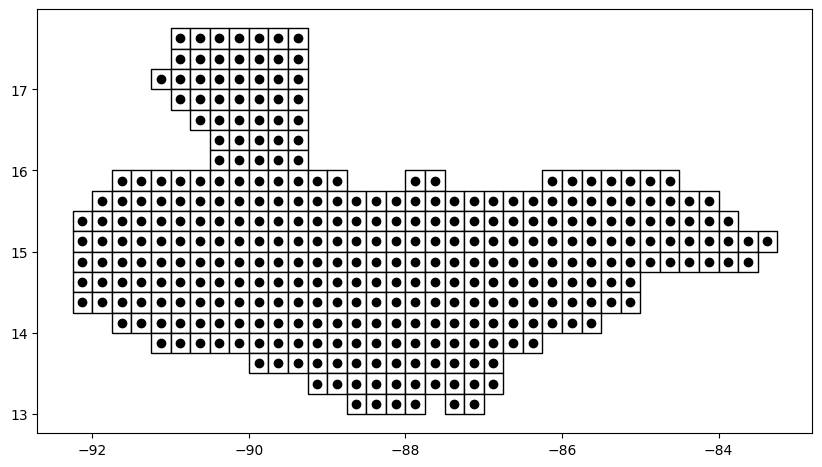

In [10]:
# load Americas MGWR dataset
americas = gp.read_file('QGIS Files/Americas/Central America/central_america.shp')
fix, ax = plt.subplots(figsize = (10, 10))
americas.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
americas.centroid.plot(ax = ax, c = 'black')
# plt.savefig('americas_shp')
plt.show()

# Ghana GWR

In [12]:
# Prepare ghana inputs
gha_y = ghana['NETRa2010'].values.reshape((-1, 1)) # does reshape need to be tacked on?
gha_X = ghana[['WATRa2010', 'ELECRa2010', 'MALIRa2010', 'MALPRa2010', 'BIRRa2010', 'EDU0Ra2010', 'EDU1Ra2010', 'EDU2Ra2010', 'EDU3Ra2010', 'EDUHRa2010', 'CONFRa2010', 'MLDSRa2010', 'MLWSRa2010', 'PRECRa2010', 'TMAXRa2010', 'TMINRa2010']].values
u = ghana['x']
v = ghana['y']
gha_coords = list(zip(u, v))

In [13]:
gha_X = (gha_X - gha_X.mean(axis=0)) / gha_X.std(axis=0)

gha_y = gha_y.reshape((-1,1))

gha_y = (gha_y - gha_y.mean(axis=0)) / gha_y.std(axis=0)

In [14]:
# calibrate a GWR model using selected bandwidth

gwr_selector = Sel_BW(gha_coords, gha_y, gha_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(gha_coords, gha_y, gha_X, gwr_bw).fit()

/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.09702e-18): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.17383e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.22143e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.75109e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.29604e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iw

349.0


In [15]:
#Calibrate MGWR model

mgwr_selector = Sel_BW(gha_coords, gha_y, gha_X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[2])
print(mgwr_bw)
mgwr_results = MGWR(gha_coords, gha_y, gha_X, mgwr_selector).fit()

/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.22665e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.10312e-18): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.09869e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.17134e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.1858e-18): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/gbby/.local/lib/python3.10/site-packages/spglm/iwl

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[382. 380. 382. 382. 382. 382. 156.  32. 382. 382. 382. 382.  18.   7.
 382. 382. 382.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 383
Number of covariates:                                                    17

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            372.745
Log-likelihood:                                                    -538.256
AIC:                                                               1110.512
AICc:                                                              1114.391
BIC:                                                              -1804.236
R2:                                                                   0.027
Adj. R2:                                                             -0.016

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [17]:
#Prepare GWR results for mapping

#Add GWR parameters to GeoDataframe
ghana['gwr_intercept'] = gwr_results.params[:,0]
ghana['gwr_WATRa2010'] = gwr_results.params[:,1]
ghana['gwr_BIRRa2010'] = gwr_results.params[:,2]
ghana['gwr_EDU1Ra2010'] = gwr_results.params[:,3]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t = gwr_results.filter_tvals()

In [17]:
#Prepare MGWR results for mapping

#Add MGWR parameters to GeoDataframe
ghana['mgwr_intercept'] = mgwr_results.params[:,0]
ghana['mgwr_WATRa2010'] = mgwr_results.params[:,1]
ghana['mgwr_BIRRa2010'] = mgwr_results.params[:,2]
ghana['mgwr_EDU1Ra2010'] = mgwr_results.params[:,3]

#Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()

In [18]:
# for export to csv
x_names = ["Intercept"] + ['WATRa2010', 'ELECRa2010', 'MALIRa2010', 'MALPRa2010', 'BIRRa2010', 'EDU0Ra2010', 'EDU1Ra2010', 'EDU2Ra2010', 'EDU3Ra2010', 'EDUHRa2010', 'CONFRa2010', 'MLDSRa2010', 'MLWSRa2010', 'PRECRa2010', 'TMAXRa2010', 'TMINRa2010']

In [19]:
rslt_df = pd.DataFrame(np.hstack([ghana.fid.values.reshape(-1,1),
                                  mgwr_results.params]))

rslt_df.columns = ["ID"] + ["param_" + x for x in x_names]
rslt_df.head()

,ID,param_Intercept,param_WATRa2010,param_ELECRa2010,param_MALIRa2010,param_MALPRa2010,param_BIRRa2010,param_EDU0Ra2010,param_EDU1Ra2010,param_EDU2Ra2010,param_EDU3Ra2010,param_EDUHRa2010,param_CONFRa2010,param_MLDSRa2010,param_MLWSRa2010,param_PRECRa2010,param_TMAXRa2010,param_TMINRa2010
0,1.0,0.052364,0.007940,-0.005021,-0.432591,0.372574,-0.014755,-0.000259,-0.001407,0.006276,-0.005666,-0.011818,-0.000718,0.022842,-0.019290,-0.000828,-0.005290,-0.053637
1,2.0,0.052529,0.009761,-0.005793,-0.431896,0.373237,-0.014406,-0.002460,-0.002355,0.006423,-0.005501,-0.011915,-0.000705,0.017738,-0.010867,-0.000260,-0.005542,-0.054337
2,3.0,0.049919,-0.007167,0.001345,-0.437707,0.367353,-0.015143,0.001530,0.008532,0.005070,-0.006122,-0.011451,-0.001228,0.138313,-0.014281,-0.006770,-0.002848,-0.047987
3,4.0,0.050317,-0.006493,0.001259,-0.437845,0.367342,-0.015953,0.001626,0.006818,0.005146,-0.006301,-0.011353,-0.001092,0.122108,-0.072213,-0.006223,-0.003056,-0.048248
4,5.0,0.050639,-0.004837,0.000552,-0.437331,0.367908,-0.016032,0.001728,0.002493,0.005279,-0.006348,-0.011369,-0.001005,0.082657,-0.163591,-0.005467,-0.003366,-0.048861


In [20]:
rslt_df.to_csv("~/Documents/Research/CERC Migration/MEMO/QGIS Files/Ghana/ghana_mgwr/ghana_mgwr_rslt.csv")

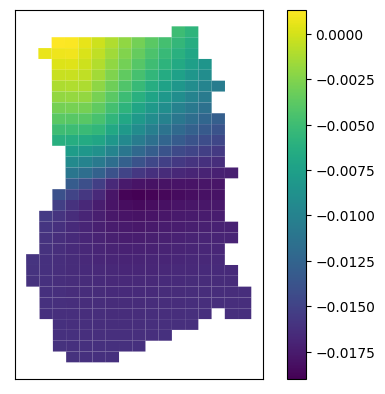

In [31]:
# Spatial variation of local R2 model fit statistic for the Ghana dataset. Model fit is highest in the southwest, and worst in the west.
ghana['params'] = mgwr_results.params[:,2]
ghana.plot('params', legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

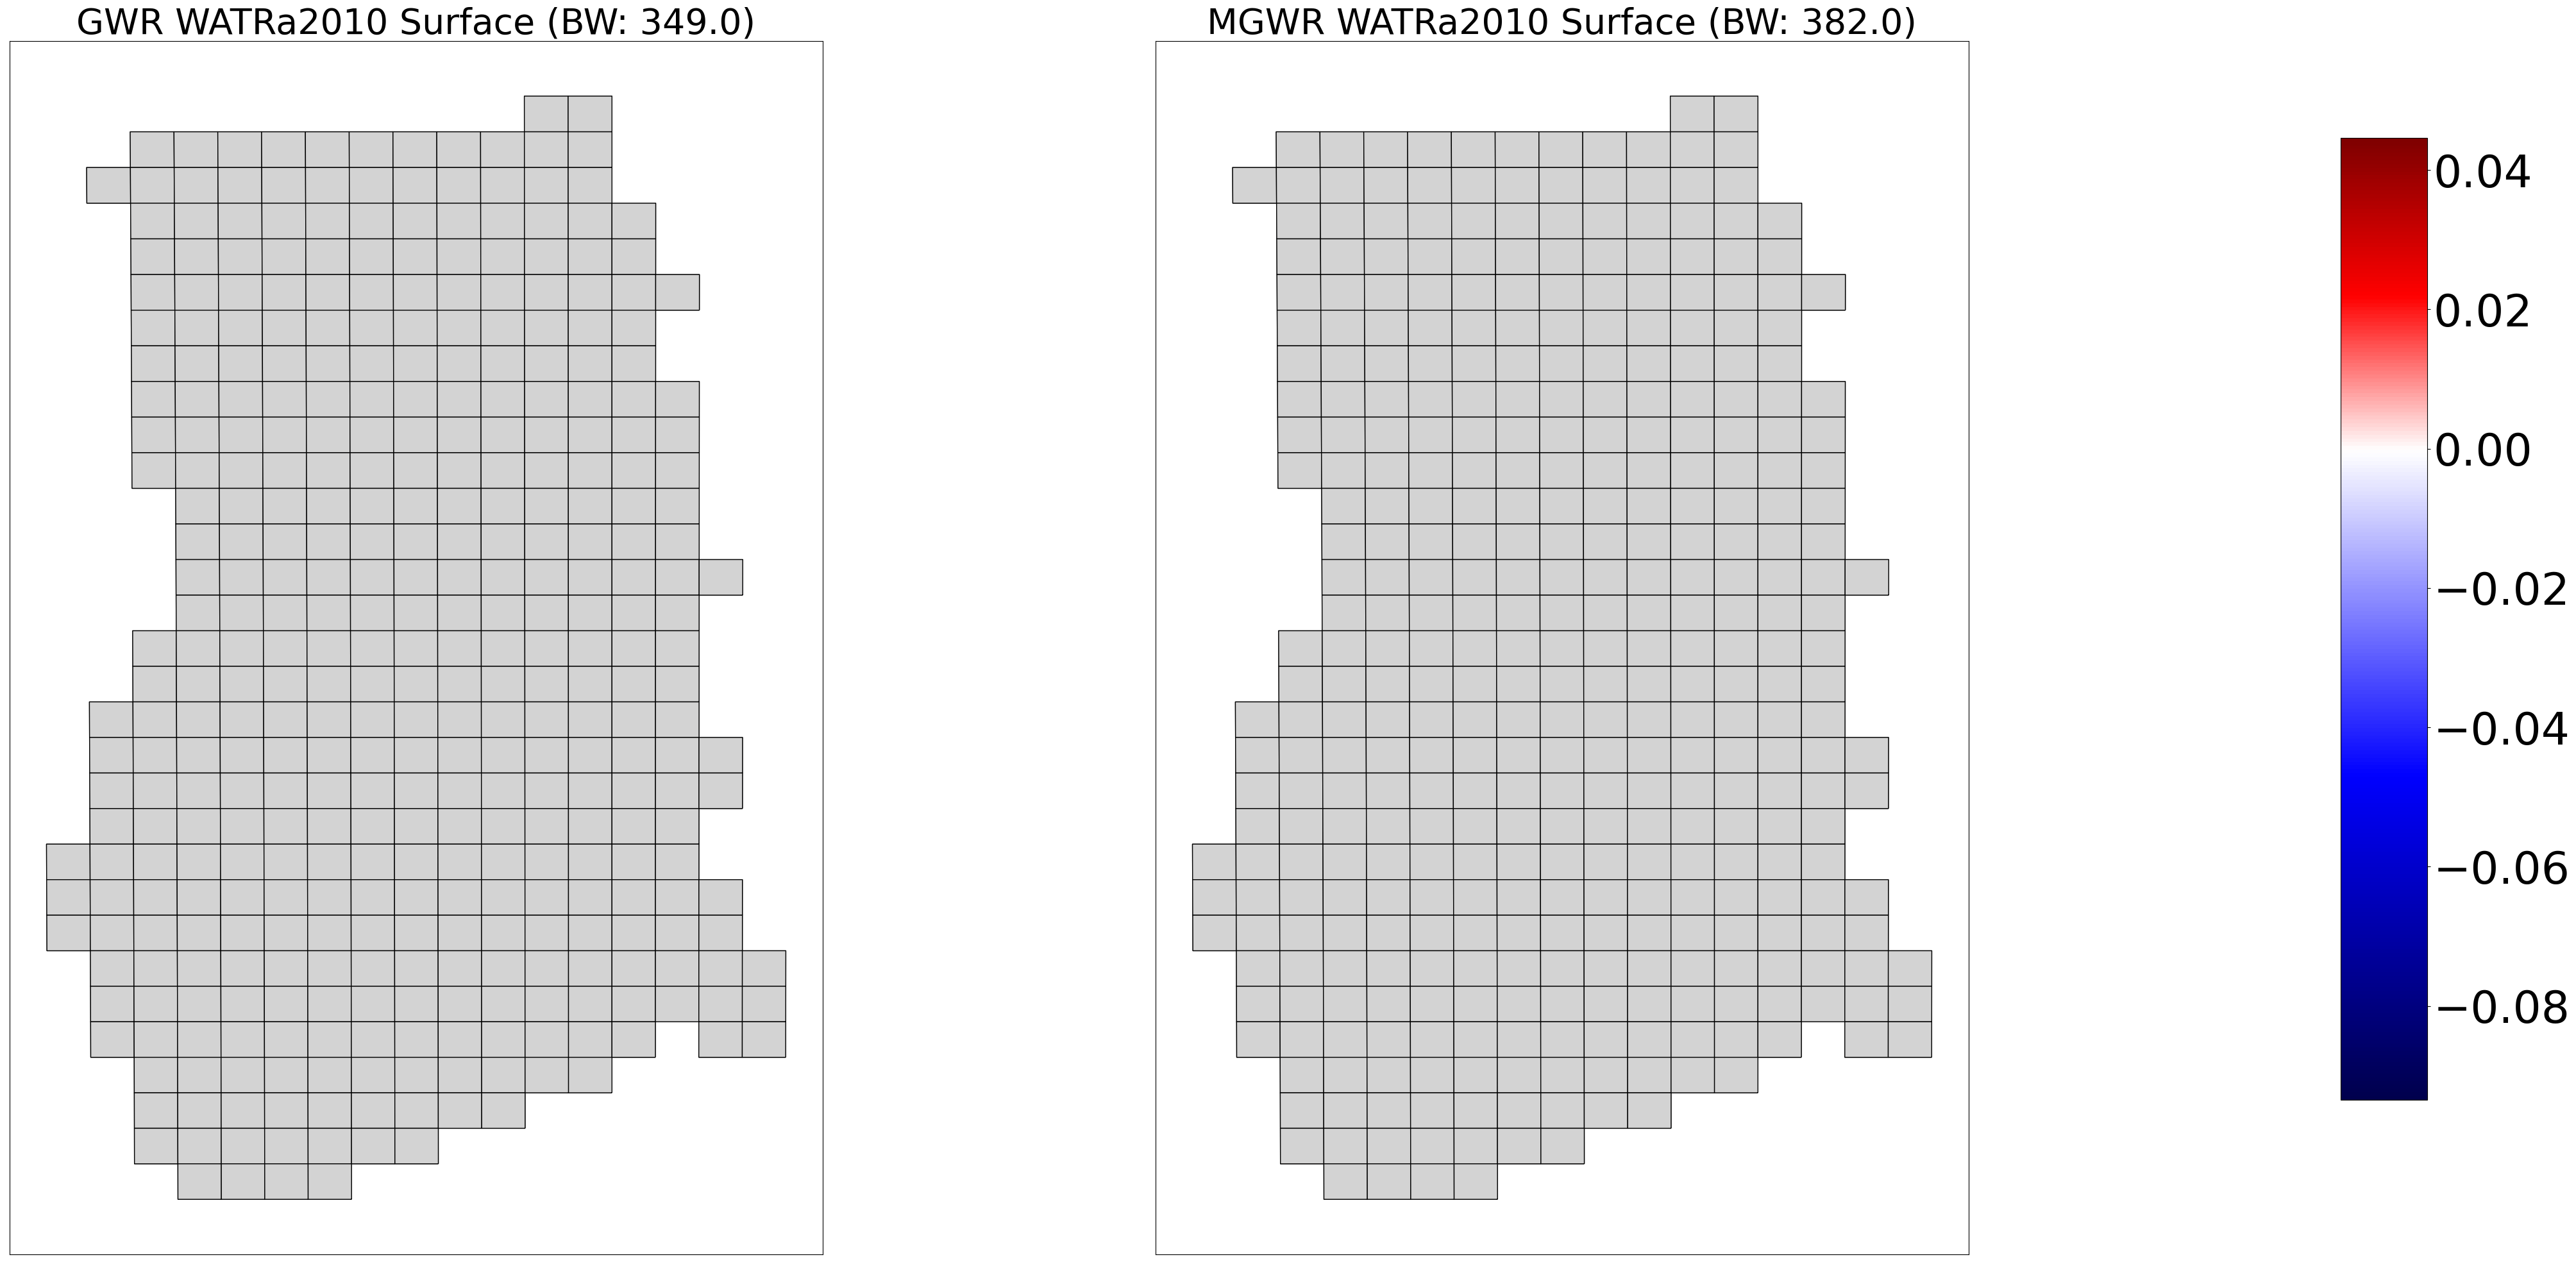

In [19]:
# this requires matplotlib 3.5.1 or older to truncate and shift the colormap

#Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

#Prep plot and add axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR WATRa2010 Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR WATRa2010 Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
gwr_min = ghana['gwr_WATRa2010'].min()
gwr_max = ghana['gwr_WATRa2010'].max()
mgwr_min = ghana['mgwr_WATRa2010'].min()
mgwr_max = ghana['mgwr_WATRa2010'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
ghana.plot('gwr_WATRa2010', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    ghana[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
ghana.plot('mgwr_WATRa2010', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    ghana[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()

# Americas GWR

In [13]:
# Prepare central america inputs
am_y = americas['NETMg2010'].values.reshape((-1, 1)) # does reshape need to be tacked on?
am_X = americas[['RURSu2010', 'PRECAv2010', 'NUTSu2010', 'SUGSu2010', 'BANSu2010']].values
u = americas['x']
v = americas['y']
am_coords = list(zip(u, v))

In [14]:
am_X = (am_X - am_X.mean(axis=0)) / am_X.std(axis=0)

am_y = am_y.reshape((-1,1))

am_y = (am_y - am_y.mean(axis=0)) / am_y.std(axis=0)

In [15]:
#Calibrate GWR model

gwr_selector = Sel_BW(am_coords, am_y, am_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(am_coords, am_y, am_X, gwr_bw).fit()

45.0


In [16]:
gwr_results.params[0:5]

array([[ 0.29078612, -0.40194391,  0.09462193, -0.02819322, -0.13261523,
         0.09466409],
       [ 0.35469312, -0.42386629,  0.09052537, -0.00114932,  0.01277012,
        -0.01438615],
       [ 0.40463915, -0.43813916,  0.09361865,  0.0120381 ,  0.13239476,
        -0.09793095],
       [ 0.44177621, -0.45992616,  0.0922798 , -0.00866982,  0.22130055,
        -0.13285444],
       [ 0.48909078, -0.4877868 ,  0.0813566 , -0.04721025,  0.34327171,
        -0.16865573]])

In [17]:
gwr_results.localR2[0:10]

array([[0.42425013],
       [0.46215126],
       [0.48530696],
       [0.50966839],
       [0.54421112],
       [0.53244643],
       [0.5156086 ],
       [0.40946963],
       [0.44683718],
       [0.48129225]])

In [18]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 335
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            307.637
Log-likelihood:                                                    -461.072
AIC:                                                                934.143
AICc:                                                               936.486
BIC:                                                              -1605.212
R2:                                                                   0.082
Adj. R2:                                                              0.068

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [19]:
gwr_results

In [20]:
#Calibrate MGWR model

mgwr_selector = Sel_BW(am_coords, am_y, am_X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[2])
print(mgwr_bw)
mgwr_results = MGWR(am_coords, am_y, am_X, mgwr_selector).fit()

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[331.  26.  32. 334. 334. 334.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 335
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            307.637
Log-likelihood:                                                    -461.072
AIC:                                                                934.143
AICc:                                                               936.486
BIC:                                                              -1605.212
R2:                                                                   0.082
Adj. R2:                                                              0.068

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [22]:
#Prepare GWR results for mapping

#Add GWR parameters to GeoDataframe
americas['gwr_intercept'] = gwr_results.params[:,0]
americas['gwr_RURSu2010'] = gwr_results.params[:,1]
americas['gwr_PRECAv2010'] = gwr_results.params[:,2]
americas['gwr_NUTSu2010'] = gwr_results.params[:,3]
americas['gwr_SUGSu2010'] = gwr_results.params[:,4]
americas['gwr_BANSu2010'] = gwr_results.params[:,5]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t = gwr_results.filter_tvals()

In [23]:
#Prepare MGWR results for mapping

#Add MGWR parameters to GeoDataframe
americas['mgwr_intercept'] = mgwr_results.params[:,0]
americas['mgwr_RURSu2010'] = mgwr_results.params[:,1]
americas['mgwr_PRECAv2010'] = mgwr_results.params[:,2]
americas['mgwr_NUTSu2010'] = mgwr_results.params[:,3]
americas['mgwr_SUGSu2010'] = mgwr_results.params[:,4]
americas['mgwr_BANSu2010'] = mgwr_results.params[:,5]

#Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()

In [25]:
# for export to csv
x_names = ["Intercept"] + ['RURSu2010', 'PRECAv2010', 'NUTSu2010', 'SUGSu2010', 'BANSu2010']

In [28]:
rslt_df = pd.DataFrame(np.hstack([americas.fid.values.reshape(-1,1),
                                  mgwr_results.params, 
                                  mgwr_results.bse]))

rslt_df.columns = ["ID"] + ["param_" + x for x in x_names] + ["bse_" + x for x in x_names]

In [29]:
rslt_df.head()

,ID,param_Intercept,param_RURSu2010,param_PRECAv2010,param_NUTSu2010,param_SUGSu2010,param_BANSu2010,bse_Intercept,bse_RURSu2010,bse_PRECAv2010,bse_NUTSu2010,bse_SUGSu2010,bse_BANSu2010
0,496.0,0.014850,0.339994,0.157427,-0.035706,-0.013592,0.013866,0.057396,0.369935,0.357793,0.044708,0.051307,0.049963
1,497.0,0.014427,0.349873,0.141945,-0.034721,-0.014106,0.013594,0.057437,0.365108,0.415065,0.044626,0.051287,0.049987
2,498.0,0.013964,0.357074,0.129457,-0.033643,-0.014701,0.013283,0.057489,0.373055,0.463090,0.044540,0.051270,0.050027
3,499.0,0.013457,0.357343,0.142919,-0.032459,-0.015396,0.012928,0.057554,0.391286,0.432461,0.044452,0.051261,0.050090
4,500.0,0.012904,0.323288,0.138612,-0.031158,-0.016219,0.012517,0.057639,0.358340,0.425942,0.044364,0.051262,0.050186


In [30]:
rslt_df.to_csv("mgwr_rslt.csv")

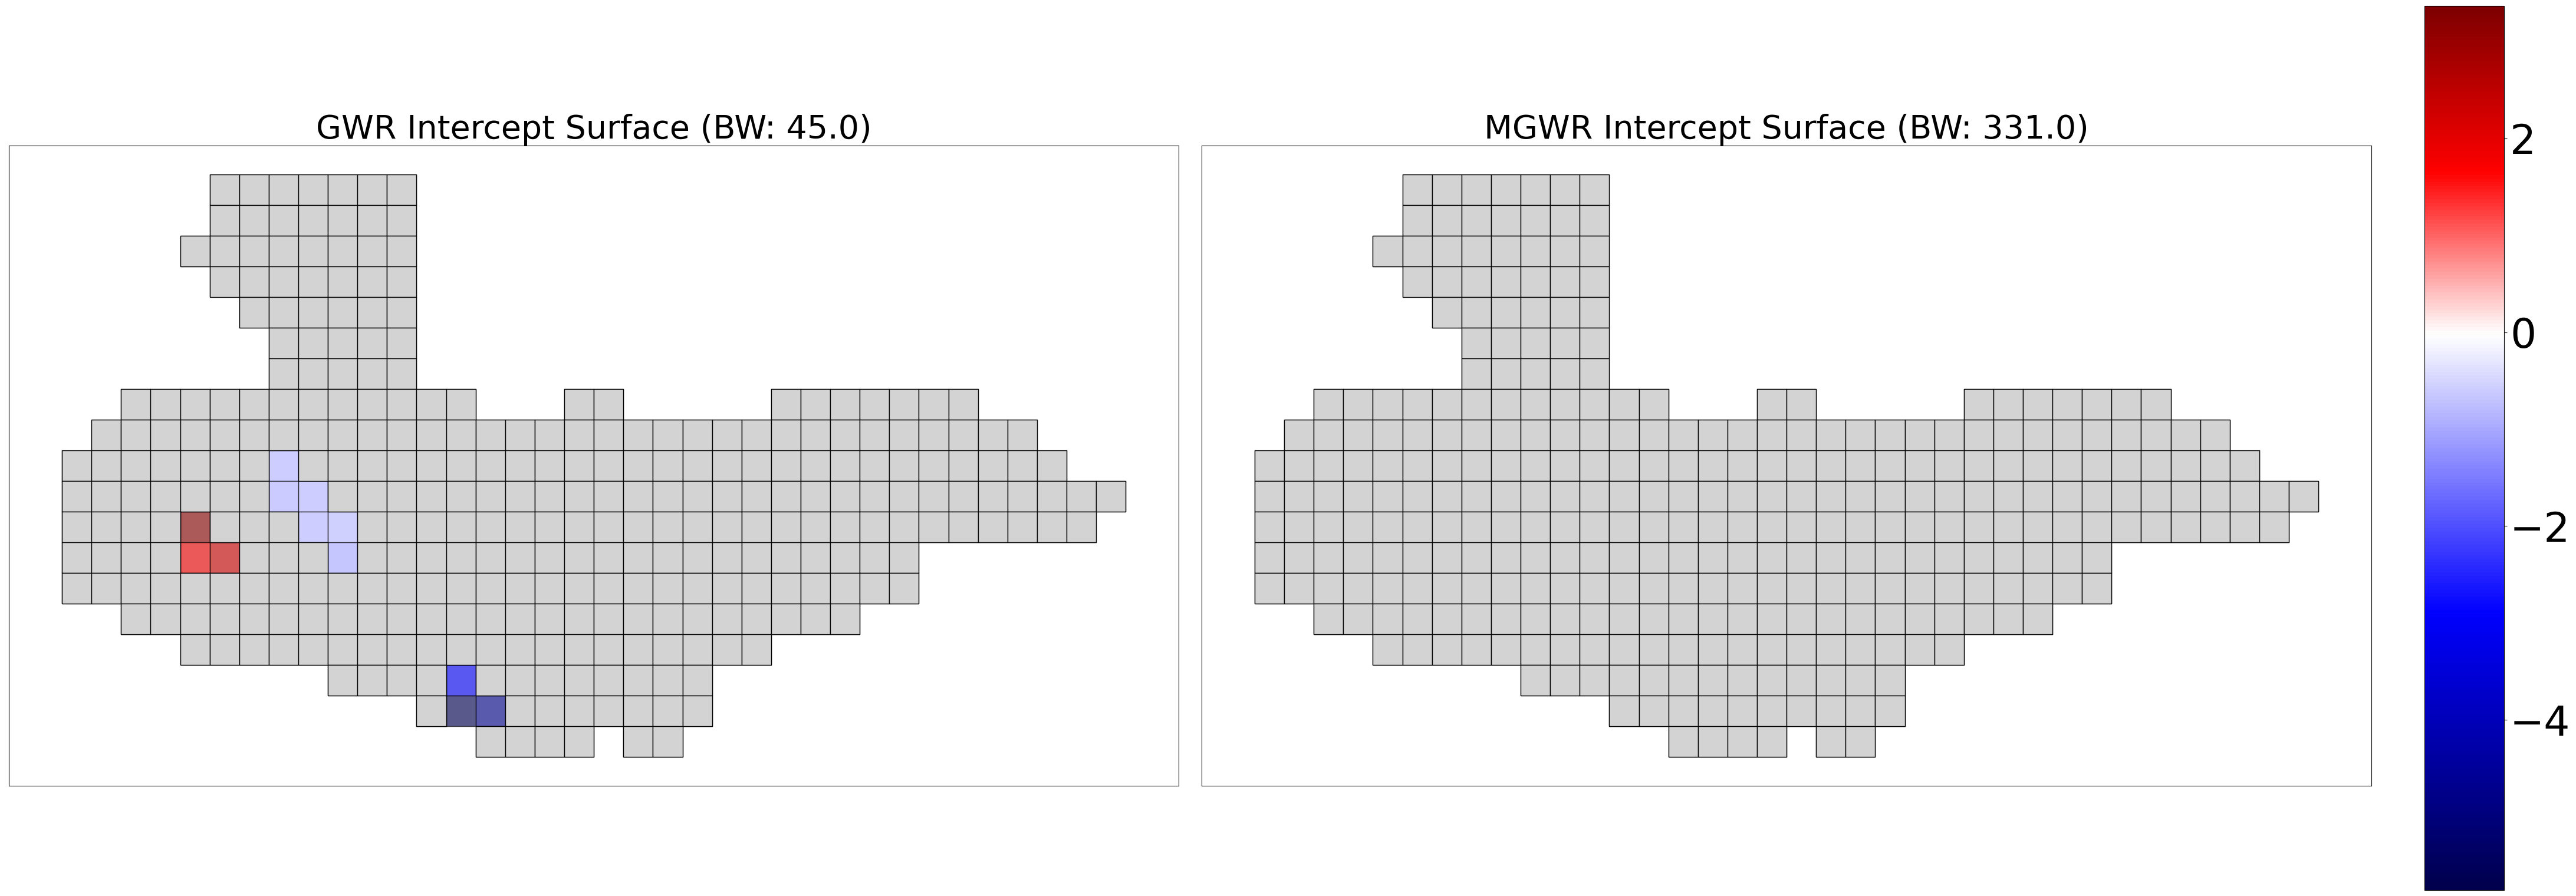

In [24]:
#Comparison maps of GWR vs. MGWR parameter surfaces where the grey units pertain to statistically insignificant parameters

#Prep plot and add axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
ax0.set_title('GWR Intercept Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
ax1.set_title('MGWR Intercept Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
gwr_min = americas['gwr_intercept'].min()
gwr_max = americas['gwr_intercept'].max()
mgwr_min = americas['mgwr_intercept'].min()
mgwr_max = americas['mgwr_intercept'].max()
vmin = np.min([gwr_min, mgwr_min])
vmax = np.max([gwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot GWR parameters
americas.plot('gwr_intercept', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (gwr_filtered_t[:,0] == 0).any():
    americas[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
americas.plot('mgwr_intercept', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    americas[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()